## Machine Learning Model to Predict Telecommunication Churning


The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.


Telecommunications companies are usually not the most popular companies with consumers and Customer loyalty is the key to profitability in the telecom industry. People often express frustration with the performance of service providers, whether it's complicated billing, spam marketing emails, difficult customer service, internet speed, connectivity, or high plans. As a result, it is not surprising to learn that telecommunications companies have a high customer churn rate. Because telecom providers manage large fixed infrastructures that must be offset by revenue, customer churn (attrition) is particularly problematic in this industry.


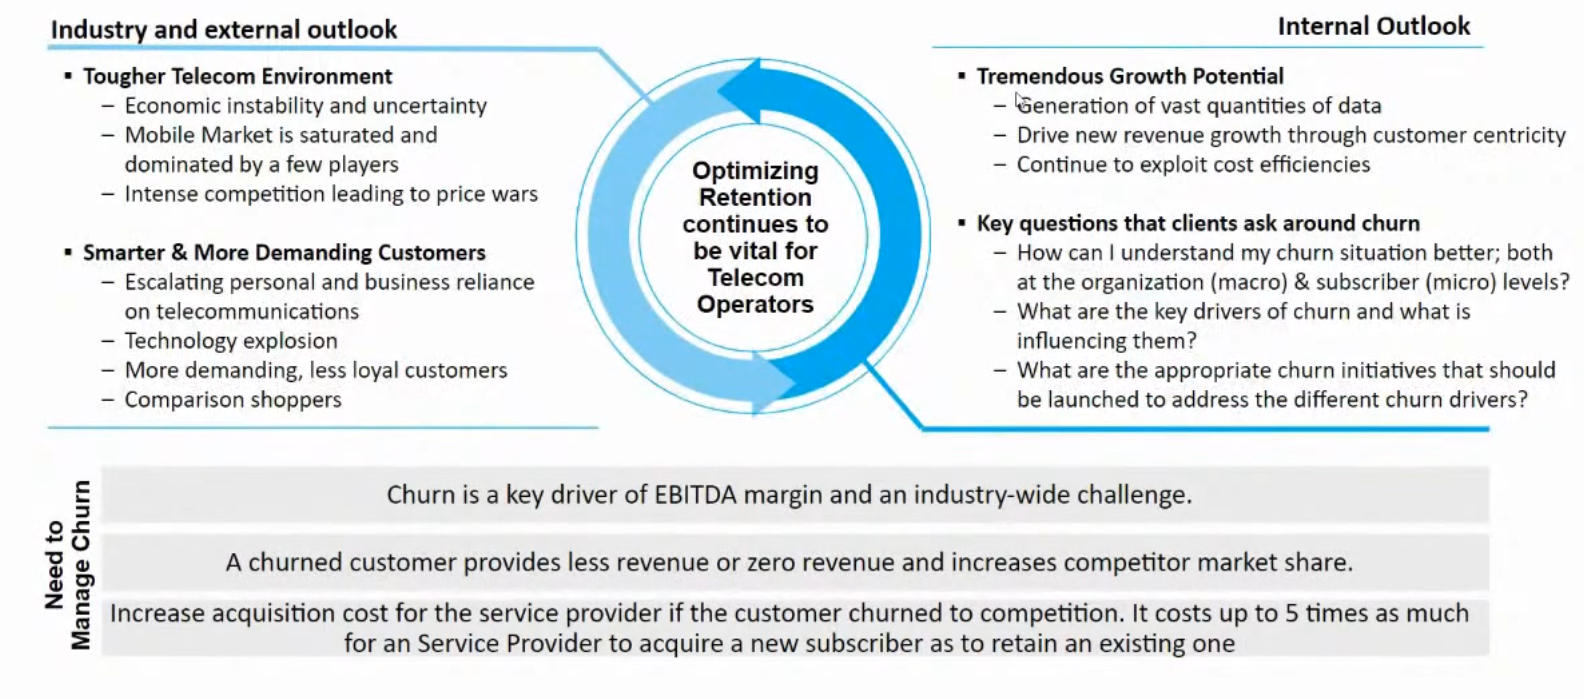

### Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in the dataset

df_telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Find out the number of rows and columns

df_telco.shape

(7043, 21)

In [4]:
## Getting the information about the dataset

df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
### Checking if there are missing values

df_telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
### Getting statistical information about the numerical columns of the dataset

df_telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
## Print out all the columns names

df_telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
## Checking the data type of all the columns

df_telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Data Exploration

Text(0.5, 1.0, 'Count of Target Variable per Categories')

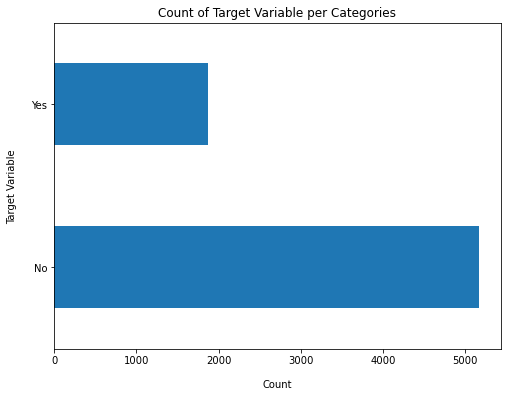

In [9]:
df_telco['Churn'].value_counts().plot(kind='barh',  figsize=(8,6))
plt.ylabel('Target Variable', labelpad=14)
plt.xlabel('Count', labelpad=14)
plt.title('Count of Target Variable per Categories')

From the chart above we can see that the number of "Yes" are far higher than "No". This tells that the target or label is very unbalanced, hence the outcome or prediction will be biased.

We have to either perform "Over-sample" or "Under-sample" on the label.

In [10]:
# To get the independent count of the label(outcome).
df_telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
# Getting the % varience of the label
100*df_telco['Churn'].value_counts()/len(df_telco['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

The data is highly unbalance with a ratio : 73.27

In [12]:
# Coincise summary of the dataframe as we have too many columns, we are using the verbose = True mode
df_telco.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Wrangling

In [13]:
# Create a copy of the dataset
df_telco2 = df_telco.copy()

In [14]:
# Converting TotalCharges from object to float

df_telco2.TotalCharges = pd.to_numeric(df_telco2.TotalCharges, errors='coerce')

In [15]:
# To get the total missing values

df_telco2.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Note:
There are 11 missing values in TotalCharges.

In [16]:
# Printing out the rows of the missing values at column "TotalCharges"

df_telco2.loc[df_telco2['TotalCharges'].isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Dealing with missing values

Since the % of the records compared to the total dataset is very low, i.e 0.15%, it is safe to drop them from further processing.

In [17]:
# Droping all the missing values

df_telco2.dropna(how='any',  inplace = True)

In [18]:
# Get the maximun tenure

print(df_telco2['tenure'].max())  #72

72


In [19]:
# Group the tenure in bins of 12 months

labels = ["{0} - {1}".format(i, i + 1) for i in range(1, 72, 12)]

df_telco2['tenure_group'] = pd.cut(df_telco2['tenure'], range(1, 80, 12), right = False, labels = labels)

In [20]:
df_telco2['tenure_group'].value_counts()

1 - 2      2175
61 - 62    1407
13 - 14    1024
25 - 26     832
49 - 50     832
37 - 38     762
Name: tenure_group, dtype: int64

In [21]:
# Drop all irrelevant columns such as customerID and tenure

df_telco2.drop(columns= ['customerID', 'tenure'], axis=1, inplace=True)
df_telco2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 2
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 26
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 2
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 38
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 2


### Data Exploration

1. Plot distribution of individual predictors by churn

#### Univariate Analysis

In [22]:
df_telco2.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 2
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 26


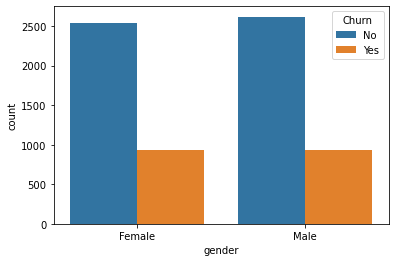

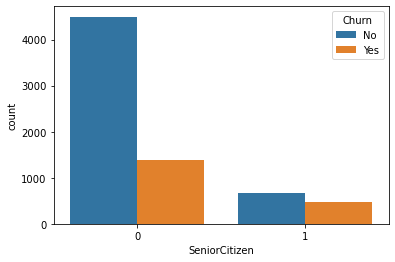

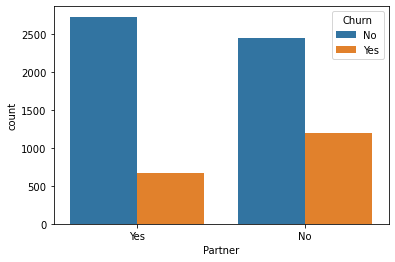

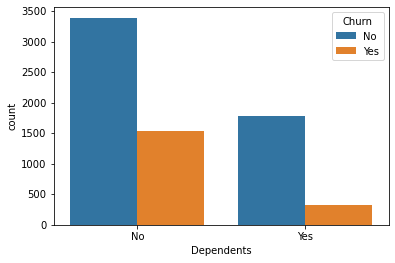

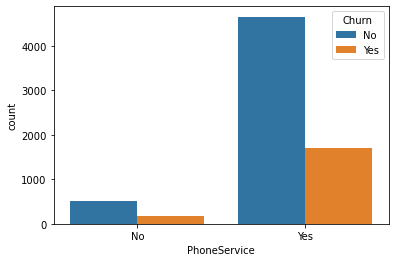

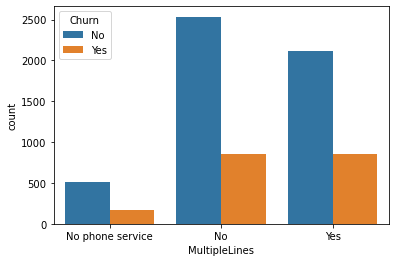

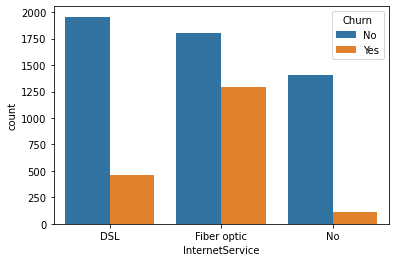

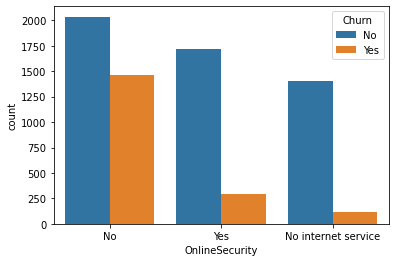

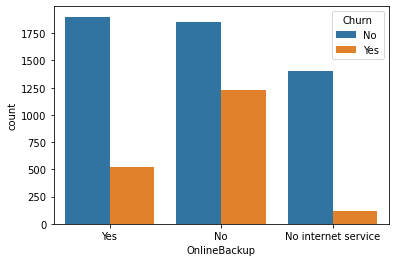

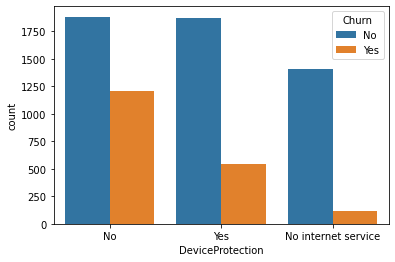

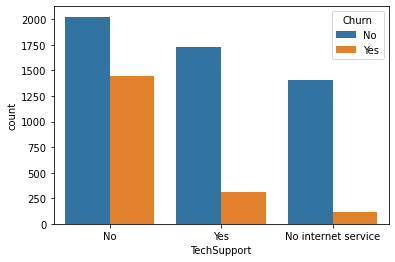

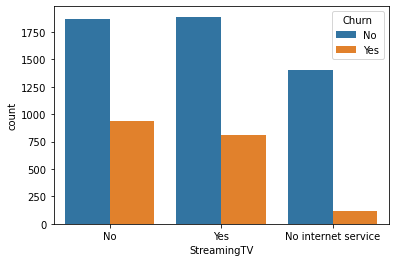

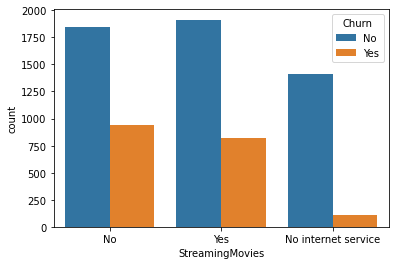

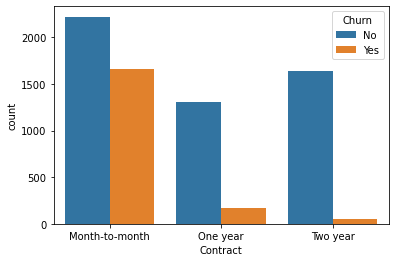

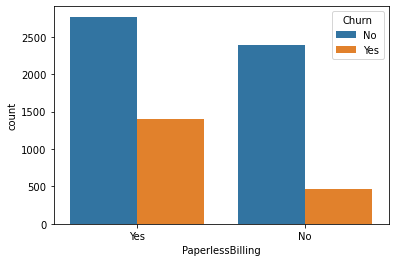

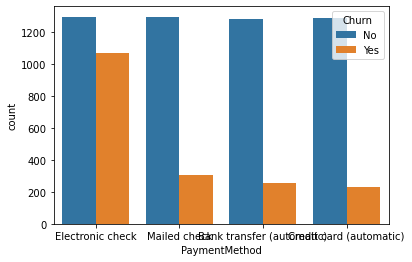

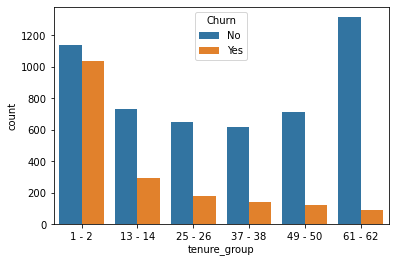

In [23]:
for i, predictor in enumerate(df_telco2.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_telco2, x=predictor, hue='Churn')

##### Encoding: Converting all columns to numerical values

In [24]:
df_telco2['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [25]:
# Convert the "Churn" column to numerical values, Yes = 1 & No = 0

df_telco2.replace({'Churn':{'Yes':1, 'No':0}}, inplace=True)

#df_telco2['Churn'] = np.where(df_telco2['Churn'] == 'Yes', 1,0)

df_telco2['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [26]:
# Converting all the categorical variables into dummy variables

telco_dummy = pd.get_dummies(df_telco2)

telco_dummy.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 2,tenure_group_13 - 14,tenure_group_25 - 26,tenure_group_37 - 38,tenure_group_49 - 50,tenure_group_61 - 62
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


##### Correlation Analysis: 
This is performed to know the relationships that exist between columns in the dataset.

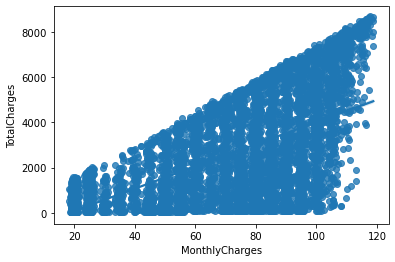

In [27]:
# Ralationship between Monthly Charges and Total Charges

sns.regplot(data=telco_dummy, x='MonthlyCharges', y='TotalCharges');

This shows that the "Total Charges" and "Monthly Charges" has linear relationship i.e as the "Total Charges" increases the "Monthly Charges" also increases.

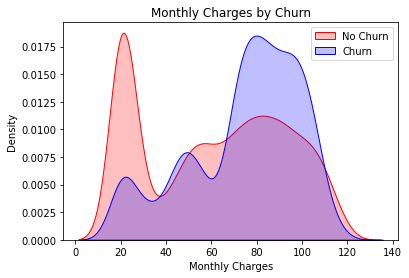

In [28]:
### Churn by Monthly Charges and Total Charges

Mth = sns.kdeplot(telco_dummy['MonthlyCharges'][(telco_dummy['Churn'] == 0)], color='Red', shade=True)
Mth = sns.kdeplot(telco_dummy['MonthlyCharges'][(telco_dummy['Churn'] == 1)], ax=Mth, color='Blue', shade=True)

Mth.legend(['No Churn', 'Churn'], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

plt.show()

The chart above show that as the "Monthly Charges" increases the possibility of churn also increases. Hence, 'Monthly Charges' and "Churn" has a linear relationship.

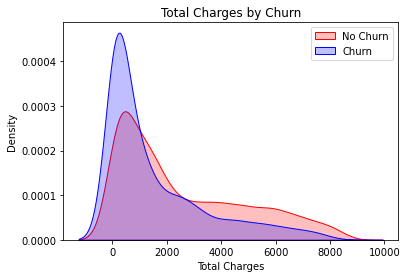

In [29]:
### Churn by Monthly Charges and Total Charges

Tot = sns.kdeplot(telco_dummy['TotalCharges'][(telco_dummy['Churn'] == 0)], color='Red', shade=True)
Tot = sns.kdeplot(telco_dummy['TotalCharges'][(telco_dummy['Churn'] == 1)], ax=Tot, color='Blue', shade=True)

Tot.legend(['No Churn', 'Churn'], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')

plt.show()

From the chart above, we can observed that as the possibility of "Churn" is high at a low "Total Charges". Hence, the 'Churn' and 'Total Charges' has a negative linear relationship.

The customers with low total charges do not patronize the telecommunication network often, they might have other network provider they prefer.

<AxesSubplot:>

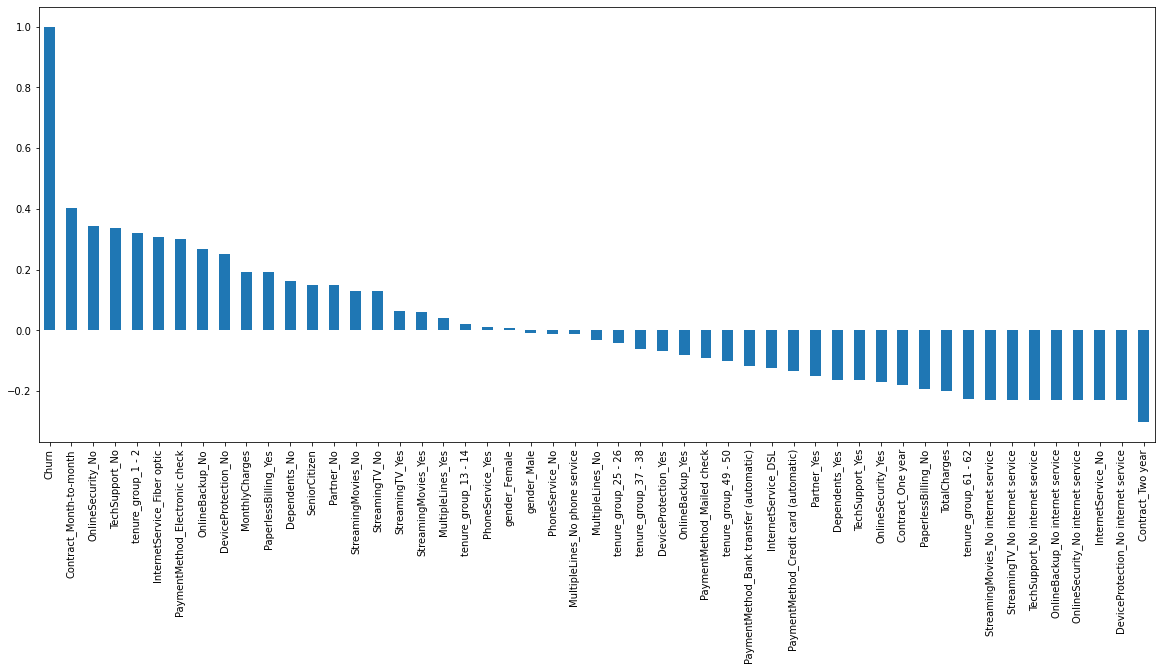

In [30]:
plt.figure(figsize=(20,8))
telco_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

High Churn can be seen in cases of Month to month contract, No online security, No Tech support, First year of subscription, First year of subscription and Fibre Optics internet.

LOW Churn is seen in cases of Long term contracts, Subscription without internet service and The customers engaged for 5+ years.

Factors like Gender, Availability of PhoneService and Number of multiple lines have almost NO impact on Churn.

This is also evident from the Heat Map.

### Bivariate Analysis

In [31]:
telco_target_0 = df_telco2.loc[df_telco2['Churn'] ==0]
telco_target_1 = df_telco2.loc[df_telco2['Churn'] ==1]

In [32]:
def uniport(df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order=df[col].
                       value_counts().
                       index, hue = hue, palette='bright')
    
    
    plt.show()

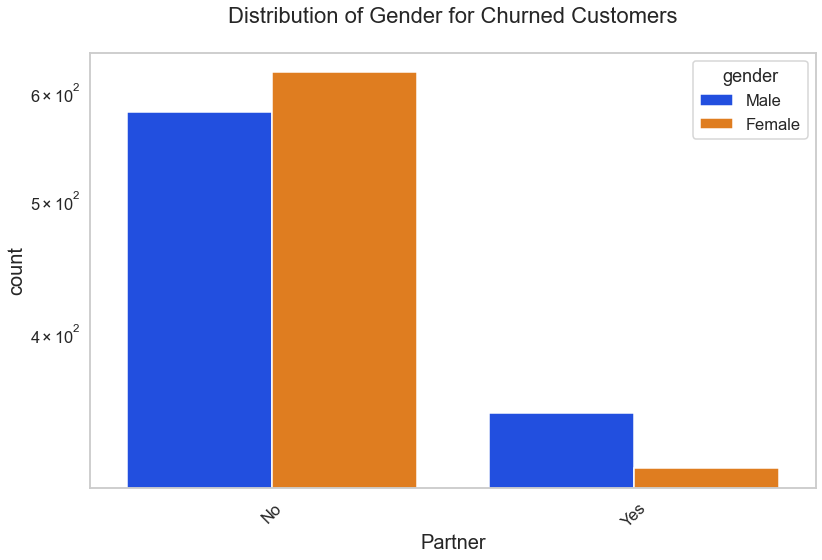

In [33]:
uniport(telco_target_1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

Form the above chart we can see that 'Yes', male are more likely to "Churn" 

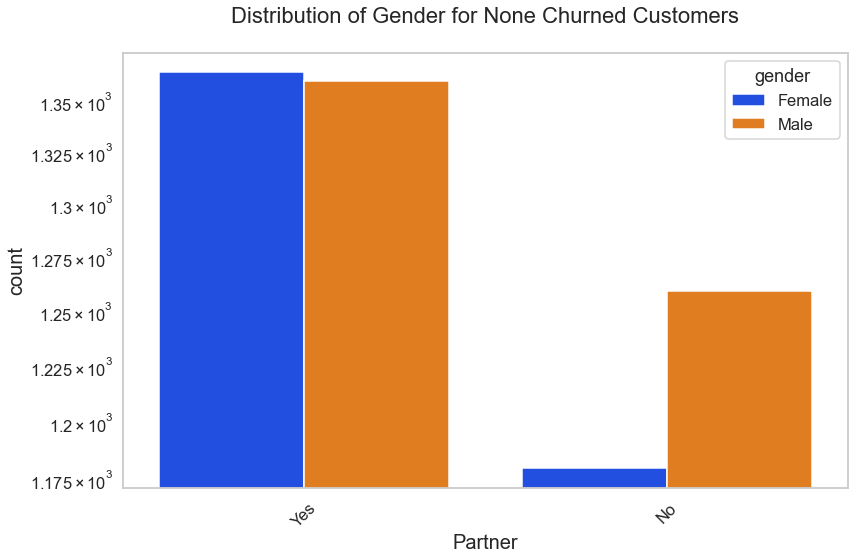

In [34]:
uniport(telco_target_0, col='Partner', title='Distribution of Gender for None Churned Customers', hue='gender')

### Building the Predictive Model

In [35]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [36]:
telco_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 2,tenure_group_13 - 14,tenure_group_25 - 26,tenure_group_37 - 38,tenure_group_49 - 50,tenure_group_61 - 62
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [37]:
# Creating x and y variables

x = telco_dummy.drop(columns='Churn', axis=1)
y = telco_dummy['Churn']

In [38]:
# Splitting the dataset into training data and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

##### Decision Tree Classifier

In [39]:
# Loading the decision tree model
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [40]:
# Training the model with the training data

model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
### Make a prediction

y_pred = model_dt.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Evaluating our model

In [43]:
# calculating the efficiency of the model
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1031
           1       0.60      0.51      0.55       376

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [44]:
## Using confusion matrix to evaluate the model 

print(confusion_matrix(y_test,y_pred))

[[903 128]
 [183 193]]


##### Using SMOTEENN to create a balance dataset

In [45]:
# SMOOTEENN is to be used to perform over-sampling> This is done because the data is highly inbalance
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [46]:
# Splitting the dataset into training data and testing data

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled,y_resampled, test_size=0.2)

In [47]:
model_dt_smot = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [48]:
model_dt_smot.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [49]:
### Make a prediction

y_pred_smot = model_dt_smot.predict(xr_test)

In [50]:
print(classification_report(yr_test, y_pred_smot, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       518
           1       0.99      0.63      0.77       647

    accuracy                           0.79      1165
   macro avg       0.84      0.81      0.79      1165
weighted avg       0.85      0.79      0.79      1165



In [51]:
print(confusion_matrix(yr_test, y_pred_smot))

[[513   5]
 [238 409]]


#### Random Forrest
Building a Random Forest Model for the unbalance dataset

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Loading the decision tree model
model_rf = RandomForestClassifier(n_estimators =100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

# Training the model with the training data
model_rf.fit(x_train, y_train)

### Make a prediction
y_pred_rf = model_rf.predict(x_test)

In [55]:
# calculating the efficiency of the model
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1031
           1       0.63      0.44      0.52       376

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [56]:
# SMOOTEENN is to be used to perform over-sampling> This is done because the data is highly inbalance
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [57]:
# Splitting the dataset into training data and testing data

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled,y_resampled, test_size=0.2)

In [58]:
model_smot_rf = RandomForestClassifier(n_estimators =100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)


In [59]:
model_smot_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [60]:
### Make a prediction

y_pred_smot_rf = model_smot_rf.predict(xr_test)

In [61]:
print(classification_report(yr_test, y_pred_smot_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       519
           1       0.99      0.56      0.71       648

    accuracy                           0.75      1167
   macro avg       0.82      0.77      0.75      1167
weighted avg       0.83      0.75      0.74      1167



In [63]:
prin = confusion_matrix(yr_test, y_pred_smot_rf)

In [64]:
print(prin)

[[515   4]
 [287 361]]


In [78]:
print(round((prin[0][0] + prin[1][1])/(prin.sum())*100,2), '%')

75.06 %


#### Conclusion
Reducing churn is more important than ever, particularly in light of the telecom industry's growing competitive pressures. At the present stage, many operators have not taken the steps required to build a strong analytical foundation for successfully establishing a truly aspiration mandate for data-based decision-making or capitalize on analytical insights. The companies that move quickly will be best positioned for success in the future.